# Project Notebook: The Linear Regression Model

## 1. Introduction

We started by building intuition for model based learning, explored how the linear regression model worked, understood how the two different approaches to model fitting worked, and some techniques for cleaning, transforming, and selecting features. In this project, you can practice what you learned by exploring ways to improve the models we built.

You'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. You can also read about the different columns in the data [here](https://s3.amazonaws.com/dq-content/307/data_description.txt).

Let's start by setting up a pipeline of functions that will let us quickly iterate on different models.

**Tasks**

1. Import pandas, matplotlib, and numpy into the environment. Import the classes you need from scikit-learn as well.
2. Read `AmesHousing.tsv` () into a pandas data frame.
3. For the following functions, we recommend creating them in the first few cells in the notebook. This way, you can add cells to the end of the notebook to do experiments and update the functions in these cells.
* Create a function named `transform_features()` that, for now, just returns the train data frame.
* Create a function named `select_features()` that, for now, just returns the Gr Liv Area and SalePrice columns from the train data frame.
* Create a function named `train_and_test()` that, for now:

1. Selects the first 1460 rows from from data and assign to train.
2. Selects the remaining rows from data and assign to test.
3. Trains a model using all numerical columns except the SalePrice column (the target column) from the data frame returned from `select_features()`
4. Tests the model on the test set and returns the `RMSE` value.

In [316]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



In [317]:
from pandas.core.dtypes.generic import ABCTimedeltaIndex
#reading data into pandas dataframe

ames_houses= pd.read_csv('AmesHousing.tsv', sep='\t')

ames_houses.sample(5)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2420,2421,528228325,120,RL,NaN,3196,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,234000
1064,1065,528166120,60,RL,110.0,13688,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,412500
1215,1216,534426040,20,RL,72.0,10007,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,8,2008,WD,Normal,145500
431,432,528110010,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
1462,1463,907260010,60,RL,NaN,11250,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,255900


In [318]:
ames_houses.shape

(2930, 82)

In [319]:
#Create a function named transform_features() that, returns the train data frame

#transform_features()

def tranform_features(df):
    return df


def select_features(df): 
    return df[['Gr Liv Area', 'SalePrice']]


def train_and_test(df):
    train = df.iloc[0:1460,:]
    test = df.iloc[1460:,:]

    selected_columns = train.select_dtypes(include = ['integer','float'])

    columns_selected = select_features(df).columns.values.tolist()   # from the select_features function
    selected_columns = selected_columns[columns_selected]

    #drop the SalePrice which is the dependent variable

    selected_columns = selected_columns.drop(columns = ['SalePrice'])
    final_features = selected_columns.columns.values.tolist()
    
    linear_reg= LinearRegression()
    linear_reg.fit(selected_columns[final_features], train['SalePrice'])
    predictions = linear_reg.predict(test[final_features])
    mse = mean_squared_error(test['SalePrice'], predictions)
    rmse = mse ** (0.5)
    
    return rmse

In [320]:
#testing our functions 

tranform_features(ames_houses)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [321]:
select_features(ames_houses)


,Gr Liv Area,SalePrice
0,1656,215000
1,896,105000
2,1329,172000
3,2110,244000
4,1629,189900
...,...,...
2925,1003,142500
2926,902,131000
2927,970,132000
2928,1389,170000


In [322]:
train_and_test(ames_houses)

57088.25161263909

## 2. Feature Engineering

Let's now start removing features with many missing values, diving deeper into potential categorical features, and transforming text and numerical columns. Update `transform_features()` so that any column from the data frame with more than 25% (or another cutoff value) missing values is dropped. You also need to remove any columns that leak information about the sale (e.g. like the year the sale happened). In general, the goal of this function is to:

* remove features that we don't want to use in the model, just based on the number of missing values or data leakage.
* transform features into the proper format (numerical to categorical, scaling numerical, filling in missing values, etc).
* create new features by combining other features.

Next, you need to get more familiar with the remaining columns by reading the data documentation for each column, determining what transformations are necessary (if any), and more. As we mentioned earlier, succeeding in predictive modeling (and competitions like Kaggle) is highly dependent on the quality of features the model has. Libraries like scikit-learn have made it quick and easy to simply try and tweak many different models, but cleaning, selecting, and transforming features are still more of an art that requires a bit of human ingenuity.

**Tasks**

1. As we mentioned earlier, we recommend adding some cells to explore and experiment with different features (before rewriting these functions).

2. The `transform_features()` function shouldn't modify the train data frame and instead return a new one entirely. This way, we can keep using train in the experimentation cells.

3. Which columns contain less than 5% missing values?
* For numerical columns that meet this criteria, let's fill in the missing values using the most popular value for that column.

4. What new features can we create, that better capture the information in some of the features?
* An example of this would be the `years_until_remod` feature we created in the last lesson.

5. Which columns need to be dropped for other reasons?
* Which columns aren't useful for machine learning?
* Which columns leak data about the final sale?

In [323]:
ames_houses.isnull().sum()


Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [324]:
# drop column with 5% or more missing values
missing = ames_houses.isnull().sum()
missing_col = (missing[missing> len(ames_houses)/20]).index
ames_houses = ames_houses.drop(missing_col, axis=1)

ames_houses.shape

(2930, 71)

In [325]:
len(ames_houses)*5/100

146.5

In [326]:
ames_houses.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900


We have removed 11 columns with missing data.

In [327]:
# drop text columns with 1 or more missing values

text_col = ames_houses.select_dtypes(include=['object']).columns
missing_text = ames_houses[text_col].isnull().sum()
ms_text_col = missing_text[missing_text >= 1].index
ames_houses = ames_houses.drop(ms_text_col, axis=1)


In [328]:
text_col = ames_houses.select_dtypes(include=['object']).columns
missing_text = ames_houses[text_col].isnull().sum()
ms_text_col = missing_text[missing_text >= 1].index
ames_houses = ames_houses.drop(ms_text_col, axis=1)

In [329]:
#filling the missing value in numerical column with the most frequent value

num_col = ames_houses.select_dtypes(include=['integer','float']).columns
num_miss = ames_houses[num_col].isnull().sum()
num_miss_cols = num_miss[num_miss > 0].index
ames_houses[num_miss_cols] = ames_houses[num_miss_cols].fillna(ames_houses[num_miss_cols].mode().iloc[0])
ames_houses.isnull().sum().sort_values()



Order              0
Central Air        0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
                  ..
Foundation         0
BsmtFin SF 1       0
BsmtFin SF 2       0
Sale Condition     0
SalePrice          0
Length: 64, dtype: int64

#We can create new features that is useful for the model by performing operation on the columns:

<li> Yr Sold
<li> Year Built
<li> Year Remod/Add

In [330]:
# creating a new feature to indicate the amount of years until the house is sold
# this will enable us work on the data- dealing with the improper Numerical Features.

ames_houses['years_sold'] = ames_houses['Yr Sold'] - ames_houses['Year Built']

# check for incorrect value

ames_houses['years_sold'][ames_houses['years_sold'] < 0] 

2180   -1
Name: years_sold, dtype: int64

In [331]:
# we can also create a new feature to indicate the amount of years until it's being renovated from the time is was sold.
ames_houses['years_since_remod'] = ames_houses['Yr Sold'] - ames_houses['Year Remod/Add']

# check for incorrect value
ames_houses['years_since_remod'][ames_houses['years_since_remod'] < 0]

1702   -1
2180   -2
2181   -1
Name: years_since_remod, dtype: int64

In [332]:
# there are incorrect values in years sold & years since remod, hence we will drop those values.

ames_houses = ames_houses.drop([2180, 1702, 2180, 2181], axis=0)

# then we can remove the original column since it's not needed anymore

ames_houses = ames_houses.drop(['Yr Sold', 'Year Remod/Add', 'Year Built'], axis=1)



We will also drop columns that:

<li> Not useful for the machine learning model.
<li> Leak data about the sale: the sale price is what we're trying to predict, and these informations give out clue to better predict the price, which is unknown in real practice. i.e 'Mo Sold', 'Sale Type', 'Sale Condition'
these already indicate a sale was done.

In [333]:
# drop the columns that are not useful for the model
ames_houses = ames_houses.drop(['PID', 'Order'], axis=1)

# drop the columns that leak information about the sale
ames_houses = ames_houses.drop(['Mo Sold', 'Sale Type', 'Sale Condition'], axis=1)

ames_houses.shape

(2927, 58)

Incorporating the steps that we have done previously into the transform_features function above

In [334]:
def transform_features(df):
    # drop column with 5% or more missing values
    missing_text = df.isnull().sum()
    missing_col = (missing_text[missing_text > len(df)/20]).index
    df= df.drop(missing_col,axis =1 )
   
    
    # drop text columns with 1 or more missing values
    text_col = df.select_dtypes(include=['object']).columns
    missing_text = df[text_col].isnull().sum()
    ms_text_col = missing_text[missing_text >= 1].index
    df = df.drop(ms_text_col, axis=1) 
    
    #fill missing value in numerical column with the most frequent value
    num_col = df.select_dtypes(include=['integer','float']).columns
    num_miss = df[num_col].isnull().sum()
    num_miss_cols = num_miss[num_miss > 0].index
    df[num_miss_cols] = df[num_miss_cols].fillna(ames_houses[num_miss_cols].mode().iloc[0])
    
    # create new features
    df['years_sold'] = df['Yr Sold'] - df['Year Built']
    df['years_since_remod'] = df['Yr Sold'] - df['Year Remod/Add']

    #drop incorrect values

    df = df.drop([2180, 1702, 2180, 2181], axis=0)

    # drop not needed & leaking columns
    df = df.drop(['Yr Sold', 'Year Remod/Add', 'Year Built', 'PID', 'Order', 'Mo Sold',
                  'Sale Type', 'Sale Condition'], axis=1)

    return df

# test the function
df = pd.read_csv('AmesHousing.tsv', delimiter='\t')
transformed = transform_features(df)
selected_features = select_features(transformed)
test = train_and_test(selected_features)
test

55275.36731241307

## 3. Feature Selection

Now that we have cleaned and transformed a lot of the features in the data set, it's time to move on to feature selection for numerical features.

**Tasks**

1. Generate a correlation heatmap matrix of the numerical features in the training data set.
* Which features correlate strongly with our target column, `SalePrice`?
* Calculate the correlation coefficients for the columns that seem to correlate well with `SalePrice`. Because we have a pipeline in place, it's easy to try different features and see which features result in a better cross validation score.

2. Which columns in the data frame should be converted to the categorical data type? All of the columns that can be categorized as nominal variables are candidates for being converted to categorical. Here are some other things you should think about:
* If a categorical column has hundreds of unique values (or categories), should you keep it? When you dummy code this column, hundreds of columns will need to be added back to the data frame.
* Which categorical columns have a few unique values but more than 95% of the values in the column belong to a specific category? This would be similar to a low variance numerical feature (no variability in the data for the model to capture).

3. Which columns are currently numerical but need to be encoded as categorical instead (because the numbers don't have any semantic meaning)?

4. What are some ways we can explore which categorical columns "correlate" well with `SalePrice`?

5. Update the logic for the `select_features()` function. This function should take in the new, modified train and test data frames that were returned from `transform_features()`.

In [335]:
# check the numerical columns
num_df = transformed.select_dtypes(include = ['float', 'integer'])
num_df


,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,years_sold,years_since_remod
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,...,210,62,0,0,0,0,0,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,...,140,0,0,0,120,0,0,105000,49,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,...,393,36,0,0,0,0,12500,172000,52,52
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,...,0,0,0,0,0,0,0,244000,42,42
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,...,212,34,0,0,0,0,0,189900,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,7937,6,6,0.0,819.0,0.0,184.0,1003.0,1003,...,120,0,0,0,0,0,0,142500,22,22
2926,20,8885,5,5,0.0,301.0,324.0,239.0,864.0,902,...,164,0,0,0,0,0,0,131000,23,23
2927,85,10441,5,5,0.0,337.0,0.0,575.0,912.0,970,...,80,32,0,0,0,0,700,132000,14,14
2928,20,10010,5,5,0.0,1071.0,123.0,195.0,1389.0,1389,...,240,38,0,0,0,0,0,170000,32,31


In [336]:
# build the correlation with target column
corr = num_df.corr()['SalePrice'].abs().sort_values()
corr

BsmtFin SF 2         0.006127
Misc Val             0.019273
3Ssn Porch           0.032268
Bsmt Half Bath       0.035875
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182751
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276258
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
years_since_remod    0.534985
Full Bath            0.546118
years_sold           0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: Sale

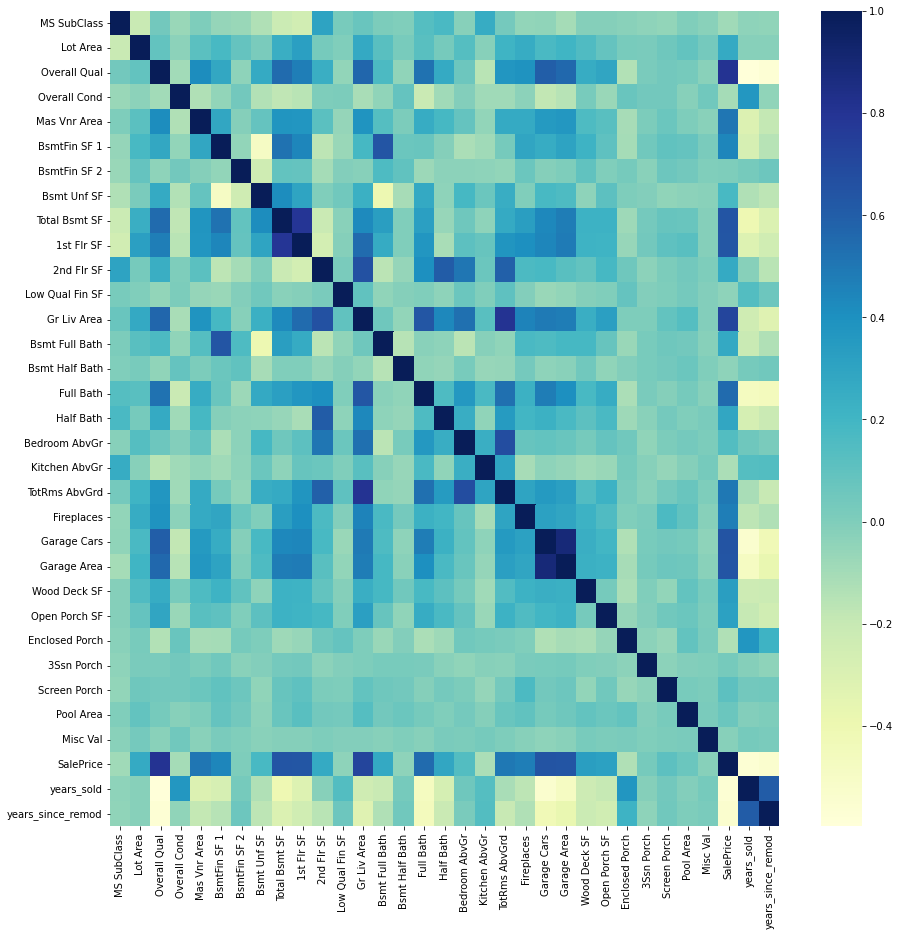

In [357]:
# plotting the correlations onto a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(num_df.corr() , cmap ='YlGnBu') 

In [338]:
# filter the columns with the correlation > 0.4
corr = corr[corr > 0.4] 
corr

BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
years_since_remod    0.534985
Full Bath            0.546118
years_sold           0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [339]:
# drop the low correlating columns
# a strong correlation is from 0.75, , which is none of the values.
# we will remove anything less than 0.4
transformed = transformed.drop(corr[corr < 0.4].index, axis=1)

In [345]:
# Create a list of column names from documentation that should be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]


In [346]:
# Create a list of column names from documentation that should be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

# list the columns that need to be transformed
trans_col = []
for i in nominal_features:
    if i in transformed.columns:
        trans_col.append(i)

# find out the unique values in each column
unique_counts = transformed[trans_col].apply(lambda x: len(x.value_counts())).sort_values()

# set the threshold for the amount of unique values. Here we will use column with <10 unique values.
nonunique_counts = unique_counts[unique_counts > 10]

# drop the columns with unique values >10
transformed = transformed.drop(nonunique_counts.index, axis=1) 

In [347]:
# select the remaining text columns and convert it to categorical data
text_cols = transformed.select_dtypes(include=['object'])

for i in text_cols:
    transformed[i] = transformed[i].astype('category')

# create dummy columns and drop the original columns
transformed = pd.concat([transformed,
                         pd.get_dummies(transformed.select_dtypes(include=['category']))
                        ], axis =1).drop(text_cols, axis=1)

In [351]:
def select_features(df, corrval=0.4, threshval=10):
    # check the numerical columns
    num_df = df.select_dtypes(include = ['float', 'int'])
    
    # build the correlation with target column
    corr = num_df.corr()['SalePrice'].abs().sort_values()
    
    # drop the low correlating columns
    df = df.drop(corr[corr < corrval].index, axis=1)
    
    # List the categorical columns
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    # list the columns that need to be transformed
    trans_col = []
    for i in nominal_features:
        if i in df.columns:
            trans_col.append(i)
            
    # find out the unique values in each column
    unique_counts = df[trans_col].apply(lambda x: len(x.value_counts())).sort_values()

    # set the threshold for the amount of unique values
    nonunique_counts = unique_counts[unique_counts > threshval]

    # drop the columns with unique values exceeding threshold value
    df = df.drop(nonunique_counts.index, axis=1) 
    
    # select the remaining text columns and convert it to categorical data
    text_cols = df.select_dtypes(include=['object'])

    for i in text_cols:
        df[i] = df[i].astype('category')

    # create dummy columns and drop the original columns
    df = pd.concat([df,
                         pd.get_dummies(df.select_dtypes(include=['category']))
                        ], axis =1).drop(text_cols, axis=1)

    return df


In [355]:
# test the function
df = pd.read_csv('AmesHousing.tsv', delimiter='\t')
transformed = transform_features(df)
selected_features = select_features(transformed)
test = train_and_test(selected_features)
test

33367.28718340236

## 4. Train and Test

Now for the final part of the pipeline, training and testing. When iterating on different features, using simple validation is a good idea. Let's add a parameter named `k` that controls the type of cross validation that occurs.

**Tasks**

1. The optional `k` parameter should accept integer values, with a default value of `0`.

2. When `k` equals `0`, perform holdout validation (what we already implemented):

* Select the first `1460` rows and assign to `train`.
* Select the remaining rows and assign to test.
* Train on `train` and `test` on test.
* Compute the `RMSE` and return.

3. When k equals 1, perform simple cross validation:

* Shuffle the ordering of the rows in the data frame.
* Select the first 1460 rows and assign to `fold_one`.
* Select the remaining rows and assign to `fold_two`.
* Train on `fold_one` and test on `fold_two`.
* Train on `fold_two` and test on `fold_one`.
* Compute the average RMSE and return.

4. When `k` is greater than `0`, implement k-fold cross validation using `k` folds:

* Perform `k-fold` cross validation using k folds.
* Calculate the average `RMSE` value and return this value.

In [354]:
# The function accepts k parameter, k=0 (default) for holdout validation, k=1 for cross validation,
# and k fold validation
def train_and_test(df, k=0):
    num_df = df.select_dtypes(include=['float', 'int'])
    features = df.columns.drop('SalePrice')
    lr = LinearRegression()

    if k==0:
        train = df[:1460]
        test = df[1460:]
    
        # train and test the model
        lr.fit(train[features], train["SalePrice"])
        pred = lr.predict(test[features])
        mse = mean_squared_error(test['SalePrice'], pred)
        rmse = np.sqrt(mse)
        
    elif k==1:
        # randomize order of rows
        np.random.seed(1)
        shuffled_index = np.random.permutation(df.index)
        df = df.reindex(shuffled_index)
        
        train = df[:1460]
        test = df[1460:]
    
        # train and test the model
        lr.fit(train[features], train["SalePrice"])
        pred1 = lr.predict(test[features])
        mse1 = mean_squared_error(test['SalePrice'], pred1)
        rmse1 = np.sqrt(mse1)
        
        lr.fit(test[features], test["SalePrice"])
        pred2 = lr.predict(train[features])
        mse2 = mean_squared_error(train['SalePrice'], pred2)
        rmse2 = np.sqrt(mse2)
        
        rmse = (rmse1 + rmse2) / 2
        
    else:
        kf = KFold(n_splits=k, shuffle=True, random_state=1)
        mses = cross_val_score(estimator=lr, X=df[features], y=df['SalePrice'], scoring='neg_mean_squared_error', cv=kf)
        rmse = np.mean(abs(mses)**0.5)

    return rmse

df = pd.read_csv('AmesHousing.tsv', delimiter='\t')
transformed = transform_features(df)
selected_features = select_features(transformed)
test = train_and_test(selected_features, k=5)
test

28832.5142496494

## 5. Next Steps

That's it for the guided steps. Here's some potenial next steps that you can take:

1. Continue iteration on feature engineering:
* Research some other approaches to feature engineering online around housing data.
* Visit the Kaggle kernels [page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels) page for this dataset to see approaches others took.

2. Improve your feature selection:
* Research ways of doing feature selection better with categorical columns (something we didn't cover in this particular course).